Import Dependencies

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from config import weather_api_key
import requests
import numpy as np

Finding count totals, Dropping NaN, dropping unnecessary columns

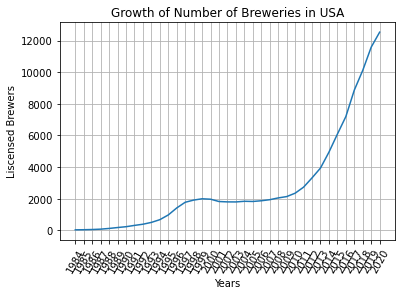

In [5]:
fed_beer_df = pd.read_csv("../Resources/brewery_count.csv")
total_count_series = fed_beer_df.sum()
total_count_series = total_count_series.drop("STATE")
years = total_count_series.index
plt.plot(years, total_count_series)
plt.xlabel("Years")
plt.ylabel("Liscensed Brewers")
plt.title("Growth of Number of Breweries in USA")
plt.grid(True)
plt.xticks(rotation = 60)
#plt.figure()  ask bailey
plt.show()

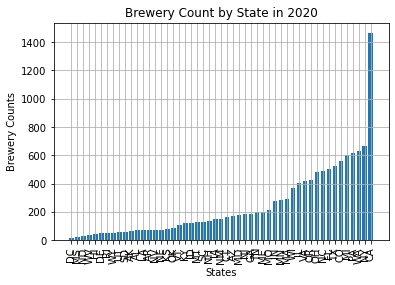

In [6]:
fed_2020 = fed_beer_df[["STATE", "2020"]].sort_values(by = "2020")
plt.bar(x = fed_2020["STATE"], height = fed_2020["2020"])
plt.xlabel("States")
plt.ylabel("Brewery Counts")
plt.title("Brewery Count by State in 2020")
plt.grid(True)
plt.xticks(rotation = 90)
#plt.figure()  ask bailey
plt.show()

In [7]:
openbrewery_db = pd.read_csv("../Resources/breweries.csv")
openbrewery_db = openbrewery_db[["name", "brewery_type", "city", "state", "postal_code", "country", "longitude", "latitude"]]
dropped_df = openbrewery_db.dropna()
dropped_df
colorado_beer = dropped_df[dropped_df["state"] == "Colorado"]
colorado_beer.to_csv("colorado_df.csv")

In [8]:
small_batch_df = openbrewery_db[(openbrewery_db["brewery_type"] == "micro") | (openbrewery_db["brewery_type"] == "brewpub")]
types = openbrewery_db["brewery_type"].value_counts()
types_other = types[7:10]
other_sum = pd.Series({ "other" : types_other.sum()})
types = types.drop(index = ["closed", "nano", "bar"])
types = types.append(other_sum)
types=types.reindex(index = (["micro","other","brewpub","regional","proprietor","contract","planning","large"]))

In [9]:
total = types.sum()
labels_per = []
for each in types:
    percent = round(each/total *100,1)
    labels_per.append(percent)
label_ser = pd.Series(labels_per, index = types.index)

Two options on the pie chart for counts, 

NameError: name 'wedges' is not defined

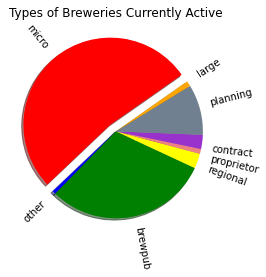

In [10]:
labels = types.index
explode = [.1,0,0,0,0,0,0,0]
colors = ["red","blue","green", "yellow", "lightcoral", "darkorchid", "slategray", "orange"]
plt.pie(types,explode = explode, labels = labels, colors = colors, shadow = True,rotatelabels = True,startangle= 35 )
plt.title("Types of Breweries Currently Active")
plt.legend(wedges,(label_ser),
          title="Percentage of Total Breweries",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0.5, 1))

plt.show()

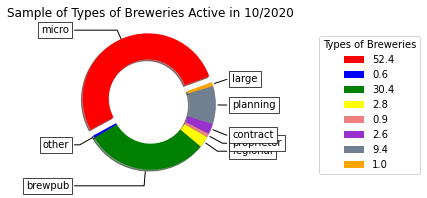

In [11]:
fig, ax = plt.subplots(figsize=(10, 3), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(types,wedgeprops=dict(width=.4), startangle=20, colors = colors, explode = explode, shadow = True)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.25*y),
                horizontalalignment=horizontalalignment, **kw)
ax.legend(wedges, labels_per,
          title="Types of Breweries",
          loc="center left",
          bbox_to_anchor=(1.5, 0, 0.5, 1))
ax.set_title("Sample of Types of Breweries Active in 10/2020")
plt.savefig(r"PieChart.png",bbox_inches="tight")
plt.show()

Used homework code because I was curious about latitude/temperature/count relationship, didn't work need to adjust, original code used Georgetown colorado name for Georgetown, DC, need state codes

In [12]:
display(dropped_df)

,name,brewery_type,city,state,postal_code,country,longitude,latitude
0,10-56 Brewing Company,micro,Knox,Indiana,46534,United States,-86.627954,41.289715
3,10 Barrel Brewing Co - Bend Pub,large,Bend,Oregon,97701,United States,-121.280954,44.091211
4,10 Barrel Brewing Co - Boise,large,Boise,Idaho,83702-5857,United States,-116.202929,43.618516
5,10 Barrel Brewing Co - Denver,large,Denver,Colorado,80205-2231,United States,-104.985366,39.759251
6,10 Barrel Brewing Co,large,Portland,Oregon,97209-2620,United States,-122.685506,45.525979
...,...,...,...,...,...,...,...,...
7790,Zorn Brew Works,micro,Michigan City,Indiana,46360-3651,United States,-86.892168,41.714577
7792,Zuni Street Brewing Company,micro,Denver,Colorado,80211-3753,United States,-105.015409,39.758593
7793,ZwanzigZ Brewing,brewpub,Columbus,Indiana,47201-5756,United States,-85.918836,39.208657
7795,Zydeco Brew Werks,brewpub,Tampa,Florida,33605-3810,United States,-82.437832,27.960344


In [ ]:
latitudes = dropped_df["latitude"]
longitudes = dropped_df["longitude"]
url = "http://api.openweathermap.org/data/2.5/weather?lat="
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
found_lats = []
found_longs = []
new_list = zip(latitudes, longitudes)
for i,x in enumerate(new_list):
    lon = x[1]
    lat = x[0]
    city_json = requests.get(f'{url}{lat}&lon={lon}&appid={weather_api_key}').json()
    display(f'Set {i} Found.')
    try:
        max_temp.append(city_json["main"]["temp_max"])
    except:
        display(f'{lat,lon} not found. Skipping...')
        pass

'Set 0 Found.'

'Set 1 Found.'

'Set 2 Found.'

'Set 3 Found.'

'Set 4 Found.'

'Set 5 Found.'

'Set 6 Found.'

'Set 7 Found.'

'Set 8 Found.'

'Set 9 Found.'

'Set 10 Found.'

'Set 11 Found.'

'Set 12 Found.'

'Set 13 Found.'

'Set 14 Found.'

'Set 15 Found.'

'Set 16 Found.'

'Set 17 Found.'

'Set 18 Found.'

'Set 19 Found.'

'Set 20 Found.'

'Set 21 Found.'

'Set 22 Found.'

'Set 23 Found.'

'Set 24 Found.'

'Set 25 Found.'

'Set 26 Found.'

'Set 27 Found.'

'Set 28 Found.'

'Set 29 Found.'

'Set 30 Found.'

'Set 31 Found.'

'Set 32 Found.'

'Set 33 Found.'

'Set 34 Found.'

'Set 35 Found.'

'Set 36 Found.'

'Set 37 Found.'

'Set 38 Found.'

'Set 39 Found.'

'Set 40 Found.'

'Set 41 Found.'

'Set 42 Found.'

'Set 43 Found.'

'Set 44 Found.'

'Set 45 Found.'

'Set 46 Found.'

'Set 47 Found.'

'Set 48 Found.'

'Set 49 Found.'

'Set 50 Found.'

'Set 51 Found.'

'Set 52 Found.'

'Set 53 Found.'

'Set 54 Found.'

'Set 55 Found.'

'Set 56 Found.'

'Set 57 Found.'

'Set 58 Found.'

'Set 59 Found.'

'Set 60 Found.'

'Set 61 Found.'

'Set 62 Found.'

'Set 63 Found.'

'Set 64 Found.'

'Set 65 Found.'

'Set 66 Found.'

'Set 67 Found.'

'Set 68 Found.'

'Set 69 Found.'

'Set 70 Found.'

'Set 71 Found.'

'Set 72 Found.'

'Set 73 Found.'

'Set 74 Found.'

'Set 75 Found.'

'Set 76 Found.'

'Set 77 Found.'

'Set 78 Found.'

'Set 79 Found.'

'Set 80 Found.'

'Set 81 Found.'

'Set 82 Found.'

'Set 83 Found.'

'Set 84 Found.'

'Set 85 Found.'

'Set 86 Found.'

'Set 87 Found.'

'Set 88 Found.'

'Set 89 Found.'

'Set 90 Found.'

'Set 91 Found.'

'Set 92 Found.'

'Set 93 Found.'

'Set 94 Found.'

'Set 95 Found.'

'Set 96 Found.'

'Set 97 Found.'

'Set 98 Found.'

'Set 99 Found.'

'Set 100 Found.'

'Set 101 Found.'

'Set 102 Found.'

'Set 103 Found.'

'Set 104 Found.'

'Set 105 Found.'

'Set 106 Found.'

'Set 107 Found.'

'Set 108 Found.'

'Set 109 Found.'

'Set 110 Found.'

'Set 111 Found.'

'Set 112 Found.'

'Set 113 Found.'

'Set 114 Found.'

'Set 115 Found.'

'Set 116 Found.'

'Set 117 Found.'

'Set 118 Found.'

'Set 119 Found.'

'Set 120 Found.'

'Set 121 Found.'

'Set 122 Found.'

'Set 123 Found.'

'Set 124 Found.'

'Set 125 Found.'

'Set 126 Found.'

'Set 127 Found.'

'Set 128 Found.'

'Set 129 Found.'

'Set 130 Found.'

'Set 131 Found.'

'Set 132 Found.'

'Set 133 Found.'

'Set 134 Found.'

'Set 135 Found.'

'Set 136 Found.'

'Set 137 Found.'

'Set 138 Found.'

'Set 139 Found.'

'Set 140 Found.'

'Set 141 Found.'

'Set 142 Found.'

'Set 143 Found.'

'Set 144 Found.'

'Set 145 Found.'

'Set 146 Found.'

'Set 147 Found.'

'Set 148 Found.'

'Set 149 Found.'

'Set 150 Found.'

'Set 151 Found.'

'Set 152 Found.'

'Set 153 Found.'

'Set 154 Found.'

'Set 155 Found.'

'Set 156 Found.'

'Set 157 Found.'

'Set 158 Found.'

'Set 159 Found.'

'Set 160 Found.'

'Set 161 Found.'

'Set 162 Found.'

'Set 163 Found.'

'Set 164 Found.'

'Set 165 Found.'

'Set 166 Found.'

'Set 167 Found.'

'Set 168 Found.'

'Set 169 Found.'

'Set 170 Found.'

'Set 171 Found.'

'Set 172 Found.'

'Set 173 Found.'

'Set 174 Found.'

'Set 175 Found.'

'Set 176 Found.'

'Set 177 Found.'

'Set 178 Found.'

'Set 179 Found.'

'Set 180 Found.'

'Set 181 Found.'

'Set 182 Found.'

'Set 183 Found.'

'Set 184 Found.'

'Set 185 Found.'

'Set 186 Found.'

'Set 187 Found.'

'Set 188 Found.'

'Set 189 Found.'

'Set 190 Found.'

'Set 191 Found.'

'Set 192 Found.'

'Set 193 Found.'

'Set 194 Found.'

'Set 195 Found.'

'Set 196 Found.'

'Set 197 Found.'

'Set 198 Found.'

'Set 199 Found.'

'Set 200 Found.'

'Set 201 Found.'

'Set 202 Found.'

'Set 203 Found.'

'Set 204 Found.'

'Set 205 Found.'

'Set 206 Found.'

'Set 207 Found.'

'Set 208 Found.'

'Set 209 Found.'

'Set 210 Found.'

'Set 211 Found.'

'Set 212 Found.'

'Set 213 Found.'

'Set 214 Found.'

'Set 215 Found.'

'Set 216 Found.'

'Set 217 Found.'

'Set 218 Found.'

'Set 219 Found.'

'Set 220 Found.'

'Set 221 Found.'

'Set 222 Found.'

'Set 223 Found.'

'Set 224 Found.'

'Set 225 Found.'

'Set 226 Found.'

'Set 227 Found.'

'Set 228 Found.'

'Set 229 Found.'

'Set 230 Found.'

'Set 231 Found.'

'Set 232 Found.'

'Set 233 Found.'

'Set 234 Found.'

'Set 235 Found.'

'Set 236 Found.'

'Set 237 Found.'

'Set 238 Found.'

'Set 239 Found.'

'Set 240 Found.'

'Set 241 Found.'

'Set 242 Found.'

'Set 243 Found.'

'Set 244 Found.'

'Set 245 Found.'

'Set 246 Found.'

'Set 247 Found.'

'Set 248 Found.'

'Set 249 Found.'

'Set 250 Found.'

'Set 251 Found.'

'Set 252 Found.'

'Set 253 Found.'

'Set 254 Found.'

'Set 255 Found.'

'Set 256 Found.'

'Set 257 Found.'

'Set 258 Found.'

'Set 259 Found.'

'Set 260 Found.'

'Set 261 Found.'

'Set 262 Found.'

'Set 263 Found.'

'Set 264 Found.'

'Set 265 Found.'

'Set 266 Found.'

In [68]:
max_temp

[272.15,
 280.37,
 281.15,
 277.59,
 283.71,
 291.48,
 277.04,
 275.37,
 272.59,
 267.59,
 288.15,
 280.15,
 279.26,
 271.15,
 277.59,
 274.26,
 283.71,
 290.93,
 278.15,
 274.26,
 276.48,
 264.82,
 286.15,
 271.48,
 280.15,
 272.59,
 273.15,
 273.15,
 273.71,
 292.59,
 280.37,
 268.04,
 266.48,
 263.15,
 276.48,
 274.26,
 289.15,
 267.15,
 273.15,
 280.93,
 276.15,
 287.59,
 274.26,
 273.71,
 297.15,
 282.15,
 291.15,
 274.26,
 262.59,
 294.15,
 277.59,
 293.71,
 284.15,
 271.15,
 296.48,
 274.15,
 288.15,
 273.15,
 277.04,
 266.15,
 273.71,
 274.82,
 286.48,
 275.37,
 273.71,
 274.15,
 279.26,
 269.26,
 274.15,
 288.15,
 262.15,
 252.15,
 278.15,
 271.15,
 288.15,
 271.15,
 271.48,
 273.15,
 280.37,
 280.93,
 289.26,
 272.04,
 289.15,
 270.15,
 273.15,
 279.15,
 290.15,
 274.15,
 268.15,
 273.15,
 291.48,
 285.37,
 272.04,
 279.82,
 272.59,
 288.71,
 276.48,
 271.15,
 265.15,
 294.26,
 271.48,
 291.15,
 271.15,
 289.15,
 281.48,
 287.04,
 273.15,
 295.15,
 296.15,
 276.15,
 271.15,
 

In [71]:
weather_df = pd.DataFrame({
    "latitude" : latitudes,
    "Max Temp (degrees F)" : max_temp,
})
weather_df["Max Temp (degrees F)"] = (weather_df["Max Temp (degrees F)"] - 273.15) *9/5 +32
weather_df.head()

,latitude,Max Temp (degrees F)
0,41.289715,30.200
3,44.091211,44.996
4,43.618516,46.400
5,39.759251,39.992
6,45.525979,51.008


Merged DataFrame, original bug shown with multiple incorrect Georgetowns

In [73]:
merged_df = pd.merge(dropped_df,weather_df, on = "latitude")
display(merged_df)

,name,brewery_type,street,state,postal_code,country,longitude,latitude,Max Temp (degrees F)
0,10-56 Brewing Company,micro,400 Brown Cir,Indiana,46534,United States,-86.627954,41.289715,30.200
1,10 Barrel Brewing Co - Bend Pub,large,62950 NE 18th St,Oregon,97701,United States,-121.280954,44.091211,44.996
2,10 Barrel Brewing Co - Boise,large,826 W Bannock St,Idaho,83702-5857,United States,-116.202929,43.618516,46.400
3,10 Barrel Brewing Co - Denver,large,2620 Walnut St,Colorado,80205-2231,United States,-104.985366,39.759251,39.992
4,10 Barrel Brewing Co,large,1411 NW Flanders St,Oregon,97209-2620,United States,-122.685506,45.525979,51.008
...,...,...,...,...,...,...,...,...,...
4970,Zorn Brew Works,micro,605 E 9th St,Indiana,46360-3651,United States,-86.892168,41.714577,30.200
4971,Zuni Street Brewing Company,micro,2355 W 29th Ave,Colorado,80211-3753,United States,-105.015409,39.758593,39.200
4972,ZwanzigZ Brewing,brewpub,1038 Lafayette Ave,Indiana,47201-5756,United States,-85.918836,39.208657,32.000
4973,Zydeco Brew Werks,brewpub,1902 E 7th Ave,Florida,33605-3810,United States,-82.437832,27.960344,69.008


Orginal working code with bugs plot shown, didn't get to add in third variable of size of point equaling to amount of breweries per latitude

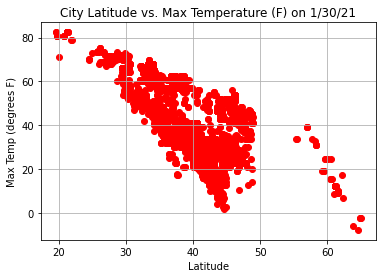

In [81]:
plt.scatter(x = merged_df["latitude"], y = merged_df["Max Temp (degrees F)"],marker = "o", c= "r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (degrees F)")
plt.title("City Latitude vs. Max Temperature (F) on 1/30/21")
plt.grid(True)
#plt.savefig("../output_data/Fig1")
plt.show()

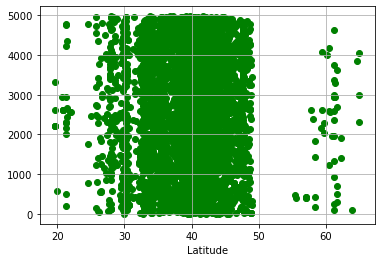

In [82]:
plt.scatter(x = merged_df["latitude"], y = merged_df.index,marker = "o", c= "g")
plt.xlabel("Latitude")
plt.grid(True)
#plt.savefig("../output_data/Fig1")
plt.show()